In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

df= pd.read_csv('Titanic-Dataset.csv')

# View head
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


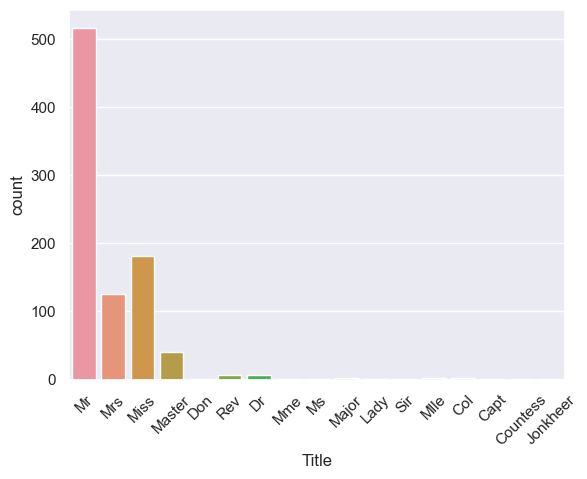

In [9]:
# Extract Title from Name, store in column and plot barplot
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);


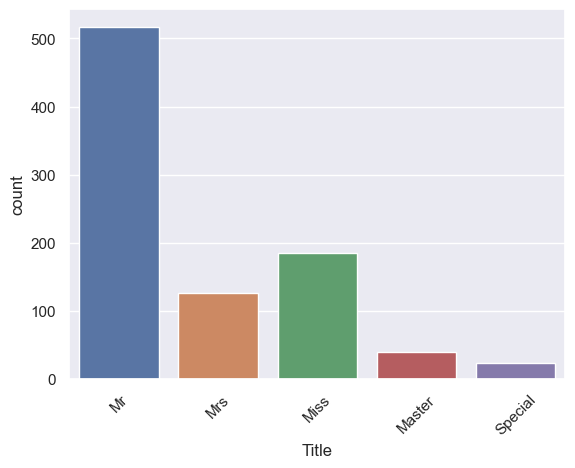

In [10]:
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);


In [20]:
~df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,True,True,True,True,True,True,True,True,True,True,False,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df['Has_Cabin']=~df.Cabin.isnull()

In [25]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,1,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True
4,0,3,male,35.0,0,0,8.0500,S,Mr,False
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Special,False
887,1,1,female,19.0,0,0,30.0000,S,Miss,True
888,0,3,female,NaN,1,2,23.4500,S,Miss,False
889,1,1,male,26.0,0,0,30.0000,C,Mr,True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   889 non-null    object 
 8   Title      891 non-null    object 
 9   Has_Cabin  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [28]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [30]:
df['Fare']=df.Fare.fillna(df.Fare.median())

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Sex         891 non-null    object
 3   SibSp       891 non-null    int64 
 4   Parch       891 non-null    int64 
 5   Embarked    889 non-null    object
 6   Title       891 non-null    object
 7   Has_Cabin   891 non-null    bool  
 8   Age_range   891 non-null    int64 
 9   Fare_range  891 non-null    int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 63.6+ KB


##### Bin the Numerical data (age % fare)

In [51]:
df['Age_range'] = pd.qcut(df.Age, q=4, labels=False)
df['Fare_range'] = pd.qcut(df.Fare, q=4, labels=False)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,Age_range,Fare_range
0,0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,3
2,1,3,female,26.0,0,0,7.9250,S,Miss,False,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True,2,3
4,0,3,male,35.0,0,0,8.0500,S,Mr,False,2,1


In [58]:
df=df.drop(['Age','Fare'],axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,Age_range,Fare_range
0,0,3,male,1,0,S,Mr,False,0,0
1,1,1,female,1,0,C,Mrs,True,3,3
2,1,3,female,0,0,S,Miss,False,1,1
3,1,1,female,1,0,S,Mrs,True,2,3
4,0,3,male,0,0,S,Mr,False,2,1


,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,Age_range,Fare_range
0,0,3,male,1,0,S,Mr,False,0,0
1,1,1,female,1,0,C,Mrs,True,3,3
2,1,3,female,0,0,S,Miss,False,1,1
3,1,1,female,1,0,S,Mrs,True,2,3
4,0,3,male,0,0,S,Mr,False,2,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Special,False,1,1
887,1,1,female,0,0,S,Miss,True,0,2
888,0,3,female,1,2,S,Miss,False,1,2
889,1,1,male,0,0,C,Mr,True,1,2


##### Creating new column of family size by adding 2 features and delete current features


In [61]:
df['Fam_size']=df.SibSp+df.Parch

In [64]:
df.head()

,Survived,Pclass,Sex,Embarked,Title,Has_Cabin,Age_range,Fare_range,Fam_size
0,0,3,male,S,Mr,False,0,0,1
1,1,1,female,C,Mrs,True,3,3,1
2,1,3,female,S,Miss,False,1,1,0
3,1,1,female,S,Mrs,True,2,3,1
4,0,3,male,S,Mr,False,2,1,0


##### converting into dummy data so all variable will convert into Numerical

In [67]:
dummy_data=pd.get_dummies(df,drop_first=True)
dummy_data

,Survived,Pclass,Has_Cabin,Age_range,Fare_range,Fam_size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0,3,False,0,0,1,True,False,True,False,True,False,False
1,1,1,True,3,3,1,False,False,False,False,False,True,False
2,1,3,False,1,1,0,False,False,True,True,False,False,False
3,1,1,True,2,3,1,False,False,True,False,False,True,False
4,0,3,False,2,1,0,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,False,1,1,0,True,False,True,False,False,False,True
887,1,1,True,0,2,0,False,False,True,True,False,False,False
888,0,3,False,1,2,3,False,False,True,True,False,False,False
889,1,1,True,1,2,0,True,False,False,False,True,False,False
